Preliminary exploratory data analysis:

In [20]:
library(repr)
library(tidyverse)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 row

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 170 Columns: 55
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (55): Atr1, Atr2, Atr3, Atr4, Atr5, Atr6, Atr7, Atr8, Atr9, Atr10, Atr11...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Divorce data:"

Atr2,Atr6,Atr11,Atr18,Atr26,Atr40,Divorced
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,0,1,0,0,3,1
4,0,4,4,1,4,1
2,3,3,3,2,3,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,0,0,0,1,2,0
0,0,0,0,0,1,0
0,0,0,0,0,0,0


[1] "Mean answers for both divorced and not divorced:"

Atr2,Atr6,Atr11,Atr18,Atr26,Atr40
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.652941,0.7470588,1.688235,1.517647,1.488235,1.870588


[1] "Mean answers for divorced:"

Atribute,value
<chr>,<dbl>
Atr2,1.6529412
Atr6,0.7470588
Atr11,1.6882353
Atr18,1.5176471
Atr26,1.4882353
Atr40,1.8705882


[1] "Mean answers for not divorced:"

Atribute,value
<chr>,<dbl>
Atr2,0.46511628
Atr6,0.37209302
Atr11,0.19767442
Atr18,0.09302326
Atr26,0.19767442
Atr40,0.20930233


[1] "No rows have missing data."

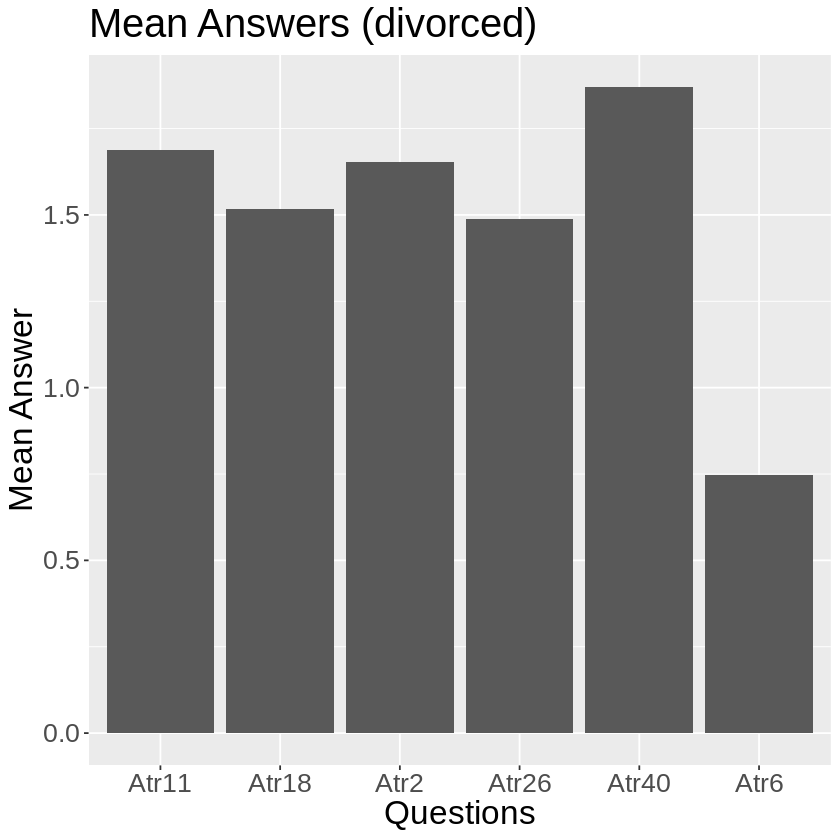

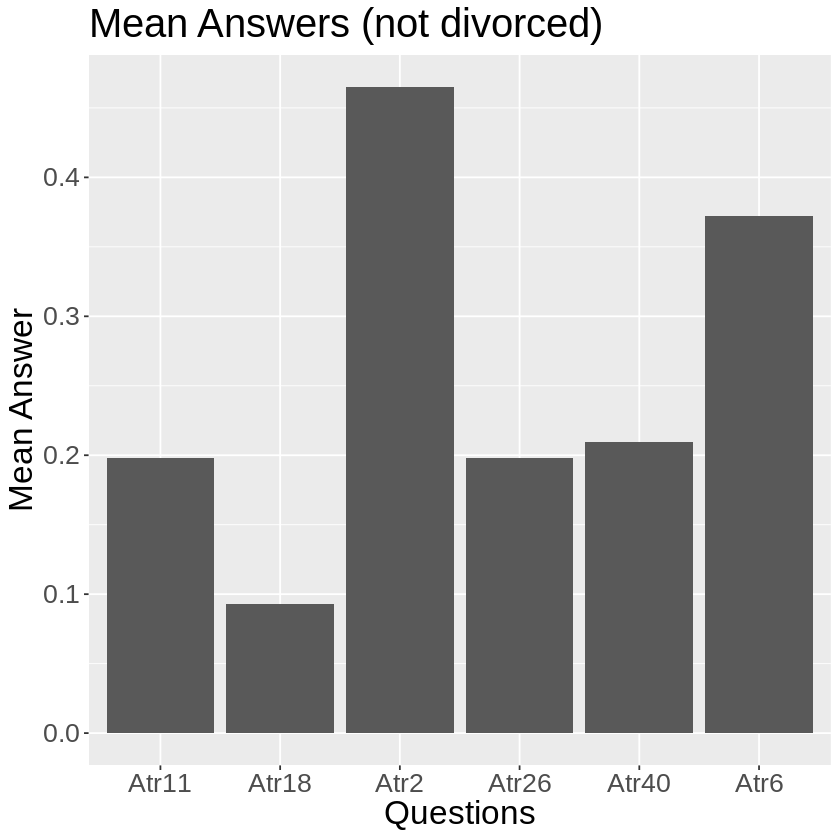

In [27]:
#Reading in the data from github
div_data <- read_csv2("https://raw.githubusercontent.com/shjuliay/group107/main/divorce%20(1).csv") %>%
mutate(Divorced = as.factor(Class)) %>%
select(Atr2, Atr6, Atr11, Atr18, Atr26, Atr40, Divorced)

"Divorce data:"
div_data

#Creating a table of the number of divorced and not divorced
div_sum <- div_data %>%
group_by(Divorced) %>%
    summarize(n = n())
#div_sum


#Creating a table for the mean answer for each question
atr_sum <- div_data %>%
select(Atr2, Atr6, Atr11, Atr18, Atr26, Atr40) %>%
map_df(mean) 

"Mean answers for both divorced and not divorced:"
atr_sum


#Creating a table for the mean answer for each question: divorced
sum_div <- div_data %>%
select(-Divorced) %>%
    map_df(mean)
#sum_div

sum_div_longer <- sum_div %>%
pivot_longer(cols = (c(Atr2, Atr6, Atr11, Atr18, Atr26, Atr40)),
             names_to = "Atribute")

"Mean answers for divorced:"
sum_div_longer


#Creating a table for the mean answer for each question: not divorced
sum_notdiv <- div_data %>%
filter(Divorced == 0) %>%
select(-Divorced) %>%
    map_df(mean) 
#sum_notdiv

sum_notdiv_longer <- sum_notdiv %>%
pivot_longer(cols = (c(Atr2, Atr6, Atr11, Atr18, Atr26, Atr40)),
             names_to = "Atribute")

"Mean answers for not divorced:"
sum_notdiv_longer

"No rows have missing data."

#creating visualizations of 6 predictor questions
sum_div_bar <- sum_div_longer %>%
ggplot(aes(x = Atribute, y = value)) +
geom_bar(stat = "identity") +
labs(x = "Questions", y = "Mean Answer") +
theme(text = element_text(size = 20)) +
ggtitle("Mean Answers (divorced)")
sum_div_bar

sum_notdiv_bar <- sum_notdiv_longer %>%
ggplot(aes(x = Atribute, y = value)) +
geom_bar(stat = "identity") +
labs(x = "Questions", y = "Mean Answer") +
theme(text = element_text(size = 20)) +
ggtitle("Mean Answers (not divorced)")
sum_notdiv_bar

In [22]:
#Reading in the questions
div_questions <- read_delim("https://raw.githubusercontent.com/shjuliay/group107/main/DivorceQuestions.txt", delim = ":", col_names = FALSE) %>%
mutate(QuestionNumber = X1, Question = X2) %>%
select(QuestionNumber, Question)
#div_questions

div_6questions <- div_questions %>%
filter(QuestionNumber == 2 | QuestionNumber == 6 | QuestionNumber == 11 | QuestionNumber == 18 | QuestionNumber == 26 | QuestionNumber == 40)
div_6questions

Rows: 55 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ":"
chr (1): X2
dbl (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


QuestionNumber,Question
<dbl>,<chr>
2,"I know we can ignore our differences, even if things get hard sometimes."
6,We don't have time at home as partners.
11,"I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other."
18,My spouse and I have similar ideas about how marriage should be
26,I know my spouse's basic anxieties.
40,We're just starting a discussion before I know what's going on.
